In [ ]:
!sudo cp -r /content/drive/MyDrive/consultancy/ /content/
%cd /content/consultancy/

/content/consultancy


In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print("a => Nifty50")
print("b => BSE Sensex")
option = input("Select file")
if option=="a":
  File = "nifty_stock_data.csv"
elif option == "b":
  File = "BSE_stock_data.csv"

path = "/content/consultancy/" + File

df = pd.read_csv(path, index_col=False)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# df.dropna(axis=0,inplace=True)
df

a => Nifty50
b => BSE Sensex
Select filea


,Unnamed: 0,Close,compound,negative,neutral,positive,Open,High,Low,Volume,monthly_return,yearly_return
Date,,,,,,,,,,,,
2007-09-17,0,4494.649902,-0.9964,0.107,0.822,0.070,4518.450195,4549.049805,4482.850098,0.0,30.571905,-37.821632
2007-09-18,1,4546.200195,-0.9979,0.127,0.795,0.078,4494.100098,4551.799805,4481.549805,0.0,29.793006,-38.252831
2007-09-19,2,4732.350098,-0.9892,0.097,0.830,0.073,4550.250000,4739.000000,4550.250000,0.0,23.964839,-40.683804
2007-09-20,3,4747.549805,-0.9922,0.115,0.800,0.084,4734.850098,4760.850098,4721.149902,0.0,24.957086,-38.075428
2007-09-21,4,4837.549805,-0.9989,0.140,0.803,0.057,4752.950195,4855.700195,4733.700195,0.0,20.873170,-39.252306
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-12,3375,15692.599609,0.0000,0.000,1.000,0.000,15766.799805,15789.200195,15644.750000,216300.0,NaN,NaN
2021-07-13,3376,15812.349609,0.2500,0.169,0.602,0.229,15794.000000,15820.799805,15744.599609,246700.0,NaN,NaN
2021-07-14,3377,15853.950195,-0.5106,0.355,0.645,0.000,15808.700195,15877.349609,15764.200195,0.0,NaN,NaN


In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,monthly_return,yearly_return
Date,,,,,,,,,,,
2007-09-17,4494.649902,-0.9964,0.107,0.822,0.070,4518.450195,4549.049805,4482.850098,0.0,30.571905,-37.821632
2007-09-18,4546.200195,-0.9979,0.127,0.795,0.078,4494.100098,4551.799805,4481.549805,0.0,29.793006,-38.252831
2007-09-19,4732.350098,-0.9892,0.097,0.830,0.073,4550.250000,4739.000000,4550.250000,0.0,23.964839,-40.683804
2007-09-20,4747.549805,-0.9922,0.115,0.800,0.084,4734.850098,4760.850098,4721.149902,0.0,24.957086,-38.075428
2007-09-21,4837.549805,-0.9989,0.140,0.803,0.057,4752.950195,4855.700195,4733.700195,0.0,20.873170,-39.252306
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-12,15692.599609,0.0000,0.000,1.000,0.000,15766.799805,15789.200195,15644.750000,216300.0,NaN,NaN
2021-07-13,15812.349609,0.2500,0.169,0.602,0.229,15794.000000,15820.799805,15744.599609,246700.0,NaN,NaN
2021-07-14,15853.950195,-0.5106,0.355,0.645,0.000,15808.700195,15877.349609,15764.200195,0.0,NaN,NaN


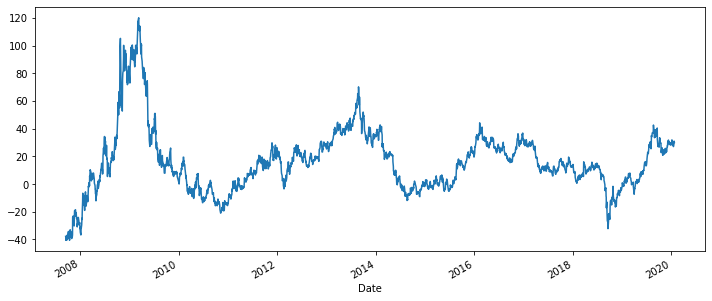

In [ ]:
df['yearly_return'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df['monthly_return'])

In [ ]:
print(df.shape)
# train=df.iloc[:-60]
# test=df.iloc[-60:]
train=df.iloc[:-666]
test=df.iloc[-666:]
print(train.shape,test.shape)

(3380, 11)
(2714, 11) (666, 11)


In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(train['yearly_return'], trace=True, suppress_warnings=True, start_P=2)
# stepwise_fit.summary()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:

model=ARIMA(train['yearly_return'],order=(2,0,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          yearly_return   No. Observations:                 2714
Model:                     ARMA(2, 1)   Log Likelihood               -6150.561
Method:                       css-mle   S.D. of innovations              2.331
Date:                Sat, 24 Jul 2021   AIC                          12311.121
Time:                        07:44:22   BIC                          12340.652
Sample:                             0   HQIC                         12321.798
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.8038      9.597      1.126      0.260      -8.006      29.614
ar.L1.yearly_return     0.6941      0.215      3.230      0.001       0.273       1.115
ar.L2.yearly_return     0.2997      0.214      1.400      0.162      -0.120       0.719
ma.L1.yearly_return     0.3930      0.208      1.892      0.058      -0.014       0.800
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0048           +0.0000j            1.0048            0.0000
AR.2           -3.3210           +0.0000j            3.3210            0.5000
MA.1           -2.5446           +0.0000j            2.5446            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred) 


Date
2018-10-30   -10.050809
2018-10-31    -9.708946
2018-11-01    -9.684896
2018-11-02    -9.565750
2018-11-05    -9.475838
                ...    
2021-07-12     9.909681
2021-07-13     9.913919
2021-07-14     9.918137
2021-07-15     9.922335
2021-07-16     9.926513
Name: ARIMA Predictions, Length: 666, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


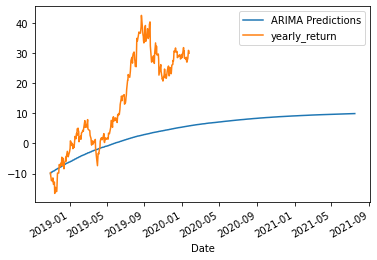

In [ ]:
pred.plot(legend=True)
test['yearly_return'].plot(legend=True)